In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import glob


data = []

classNames = ["Cyst","Normal","Stone","Tumor"]

for label,folder in enumerate(classNames):
    res = glob.glob(f"/kaggle/input/practical/Kidney /CT_KIDNEY/{folder}/*jpg")
    for filepath in res:
        data.append({
            "img_label":filepath,
            "label":label
        })
        


In [2]:
data = pd.DataFrame(data)
data

,img_label,label
0,/kaggle/input/practical/Kidney /CT_KIDNEY/Cyst...,0
1,/kaggle/input/practical/Kidney /CT_KIDNEY/Cyst...,0
2,/kaggle/input/practical/Kidney /CT_KIDNEY/Cyst...,0
3,/kaggle/input/practical/Kidney /CT_KIDNEY/Cyst...,0
4,/kaggle/input/practical/Kidney /CT_KIDNEY/Cyst...,0
...,...,...
1185,/kaggle/input/practical/Kidney /CT_KIDNEY/Tumo...,3
1186,/kaggle/input/practical/Kidney /CT_KIDNEY/Tumo...,3
1187,/kaggle/input/practical/Kidney /CT_KIDNEY/Tumo...,3
1188,/kaggle/input/practical/Kidney /CT_KIDNEY/Tumo...,3


In [3]:
import cv2
shape = [ ]
for value in data["img_label"]:
    a = cv2.imread(value)
    shape.append(a)

In [4]:
shape[133].shape

(765, 947, 3)

In [5]:
import cv2
images = [ ]
for value in data["img_label"]:
    resize_image = cv2.imread(value)
    resize = cv2.resize(resize_image,(224,224))
    images.append(resize)

In [6]:
images[0].shape

(224, 224, 3)

In [7]:
images = np.array(images)

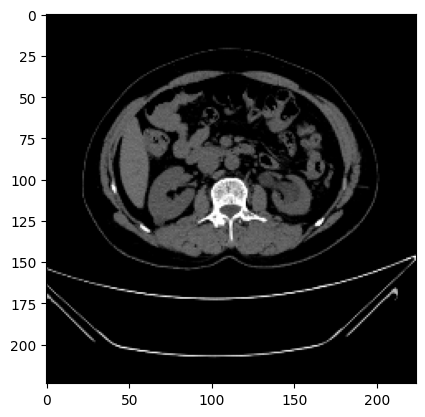

In [8]:
plt.imshow(images[4])
plt.show()

In [9]:
label = []
for value in data["label"]:
    label.append(value)

In [10]:
label = np.array(label)

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(images,label,test_size=0.2,random_state=49)
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size = 0.5,random_state=49)

print(len(x_train))
print(len(x_test))

print(len(x_val))
print(len(x_test))

952
119
119
119


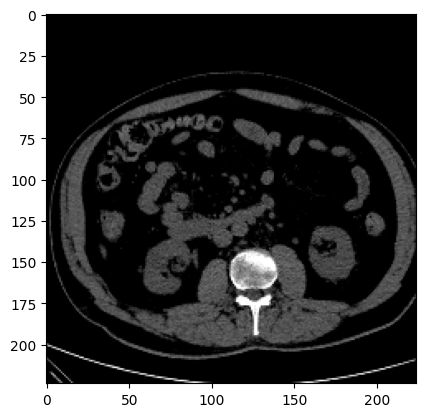

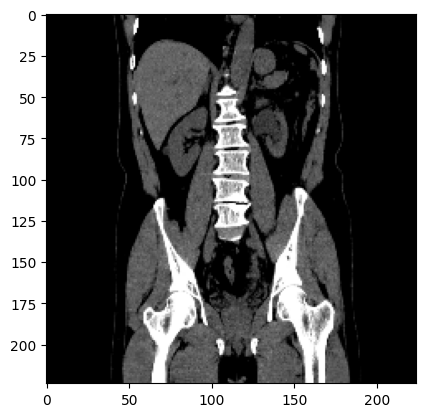

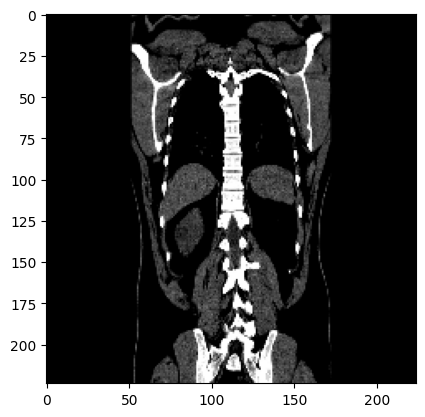

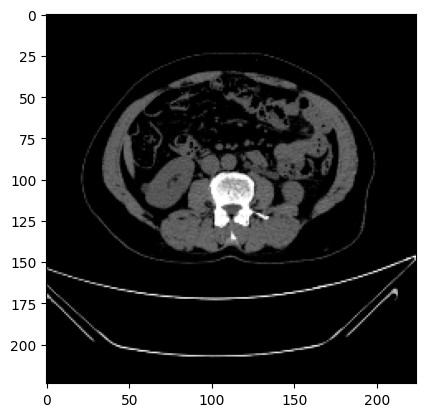

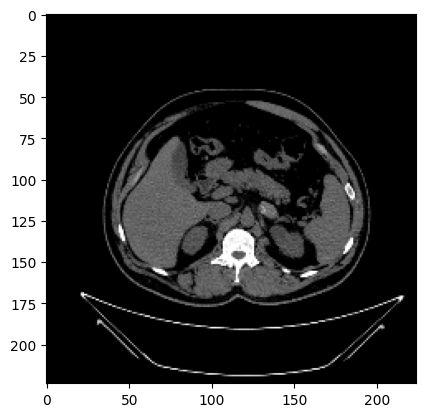

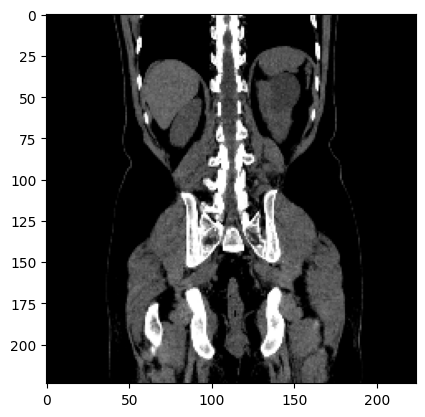

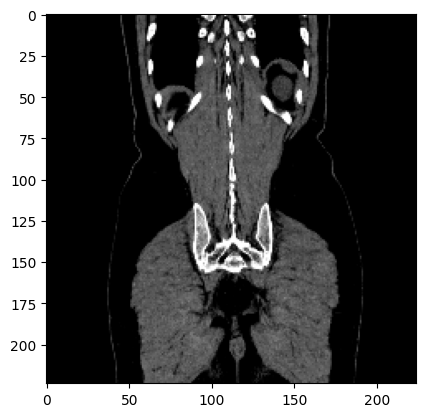

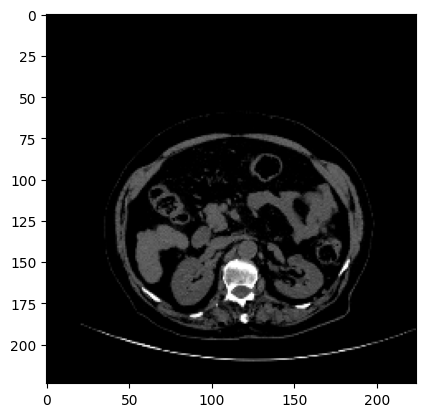

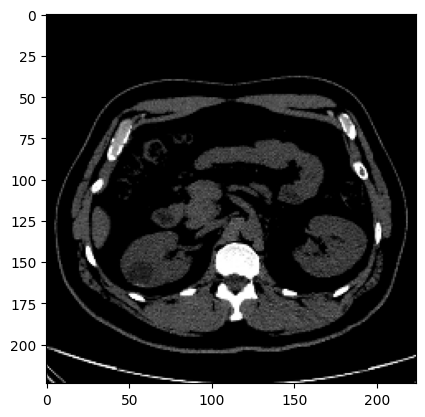

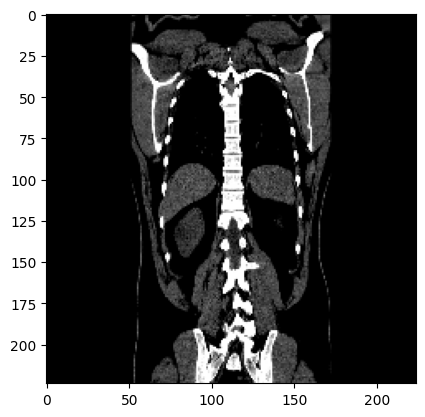

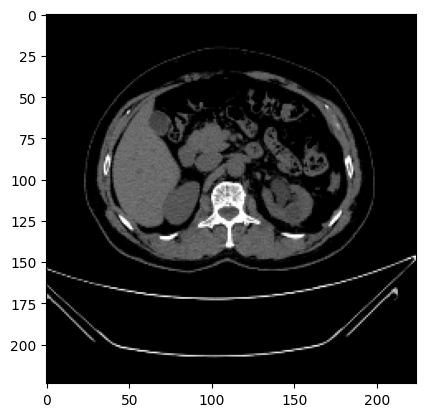

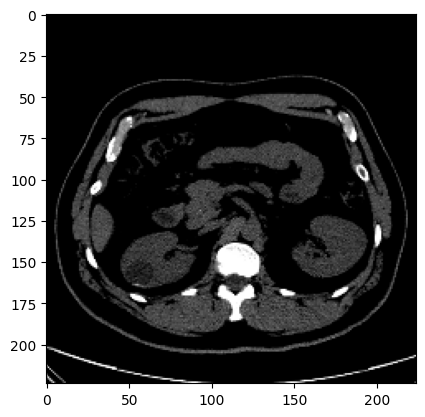

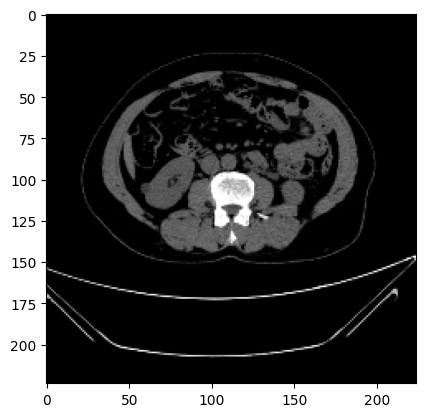

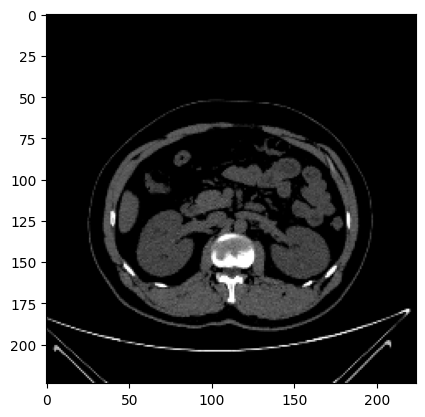

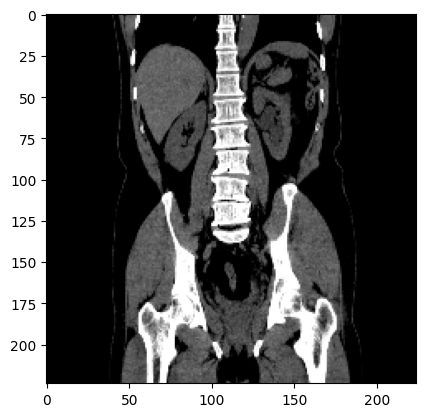

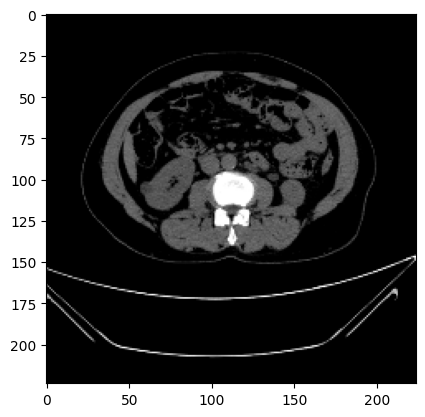

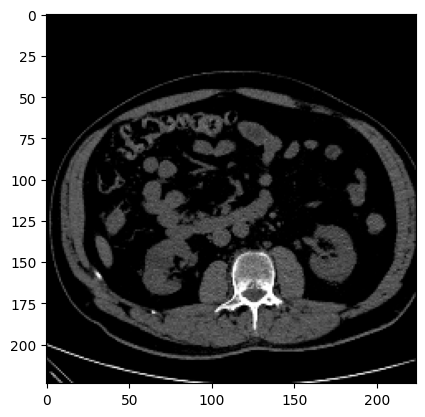

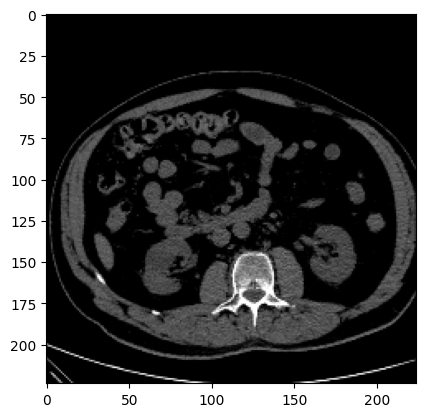

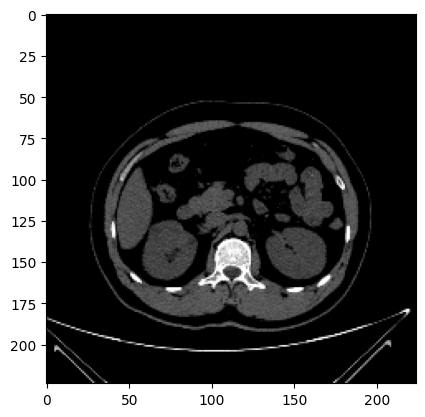

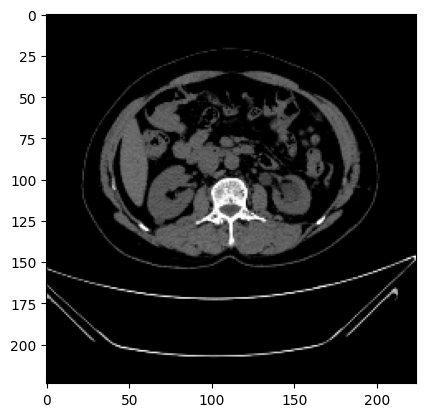

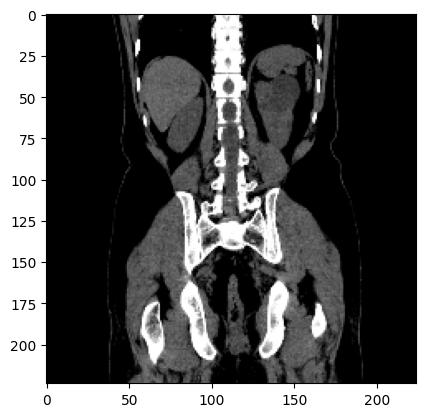

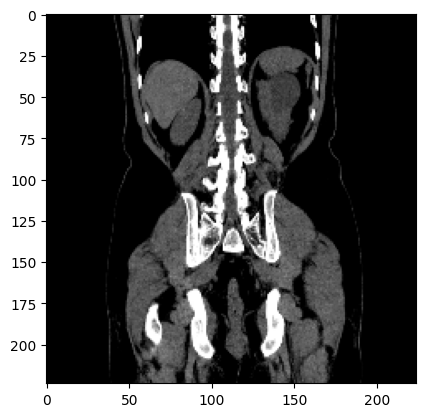

In [31]:
for i in range(0,22):
    val = 98
    plt.imshow(images[val+i])
    plt.show()

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from tensorflow.keras.optimizers import Adam


model = Sequential([
  Conv2D(32,3,activation="relu"),
  MaxPooling2D((2,2)),
  Conv2D(64,3,activation="gelu"),
  MaxPooling2D((2,2)),
  Conv2D(128,3,activation="selu"),
  Flatten(),
  Dense(1024,activation="relu"),
  Dense(4,activation="softmax")
])


In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss="sparse_categorical_crossentropy",metrics=["acc"])
history = model.fit(x_train,y_train,batch_size=16,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
 3/60 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - acc: 0.2778 - loss: 54.3123 

I0000 00:00:1716184878.856094     439 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716184878.876302     439 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - acc: 0.7091 - loss: 58.1549

W0000 00:00:1716184884.382845     438 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716184884.986294     439 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - acc: 0.7118 - loss: 57.5742 - val_acc: 0.9916 - val_loss: 1.4986
Epoch 2/20
 3/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 1.0000 - loss: 1.4197e-07

W0000 00:00:1716184886.094980     437 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 1.0000 - loss: 3.3599e-07 - val_acc: 0.9916 - val_loss: 1.4960
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 1.0000 - loss: 3.0860e-07 - val_acc: 0.9916 - val_loss: 1.4960
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 1.0000 - loss: 5.6119e-07 - val_acc: 0.9916 - val_loss: 1.4959
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 1.0000 - loss: 3.8868e-07 - val_acc: 0.9916 - val_loss: 1.4959
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 1.0000 - loss: 1.3022e-07 - val_acc: 0.9916 - val_loss: 1.4959
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 1.0000 - loss: 2.9519e-07 - val_acc: 0.9916 - val_loss: 1.4958
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 1.0000 - loss: 3.9321e-07 - val_acc: 0.9916 - val_loss: 1.4958
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 1.0000 - loss: 2.9248e-07 - val_acc: 0.9916 - val_loss: 1.4957
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 3

In [23]:
model.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 1.0000 - loss: 1.2021e-09


[3.005275805989527e-09, 1.0]

In [21]:
from sklearn.metrics import classification_report

predict = model.predict(x_test)
res = np.argmax(predict,axis = 1)
report = classification_report(y_test,res)
print("classification_report\n",report)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        21

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119



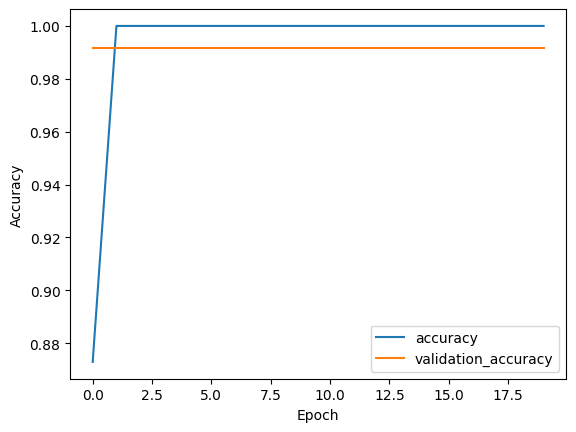

In [17]:
plt.plot(history.history["acc"],label="accuracy")
plt.plot(history.history["val_acc"],label="validation_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


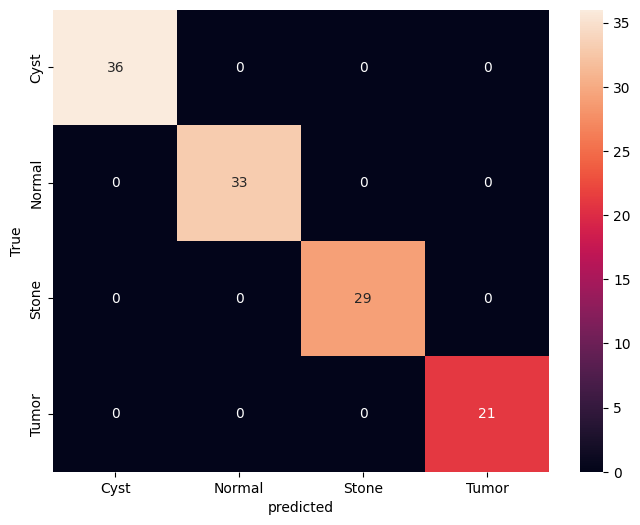

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_name =["Cyst","Normal","Stone","Tumor"]

predict = model.predict(x_test)
y_true = y_test
res= np.argmax(predict,axis =1)

conf = confusion_matrix(y_test,res)

plt.figure(figsize=(8,6))
sns.heatmap(conf,annot= True,xticklabels=class_name,yticklabels=class_name)
plt.xlabel("predicted")
plt.ylabel("True")
plt.show()

In [38]:
predict = model.predict(x_test)
y_true = y_test
res= np.argmax(predict,axis =1)

conf = confusion_matrix(y_test,res)

print(conf)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[36  0  0  0]
 [ 0 33  0  0]
 [ 0  0 29  0]
 [ 0  0  0 21]]
